<a href="https://colab.research.google.com/github/stevengregori92/RandomizedSearchCV-Mobile-with-RandomForest-part-4/blob/main/RandomnizedSearchCV_Mobile_Phone_with_RandomForest_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.3 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366842 sha256=9f0f95b5ce484996c296b09c1819e52553e01df30e49a4fcc7d9783c5a4ca91e
  Stored in directory: /root/.cache/pip/wheels/1b/49/54/8dfa7de82599da47df8c290f769ade64075dc7a0a2a4fd7414
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=1ddb63afda4388f98faafa6db304a6315b486399433df324894cde9a431cb80e
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built luwiji jcopml


#Import Libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from jcopml.tuning import random_search_params as rsp
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from jcopml.feature_importance import mean_score_decrease

In [3]:
from luwiji.random_forest import illustration

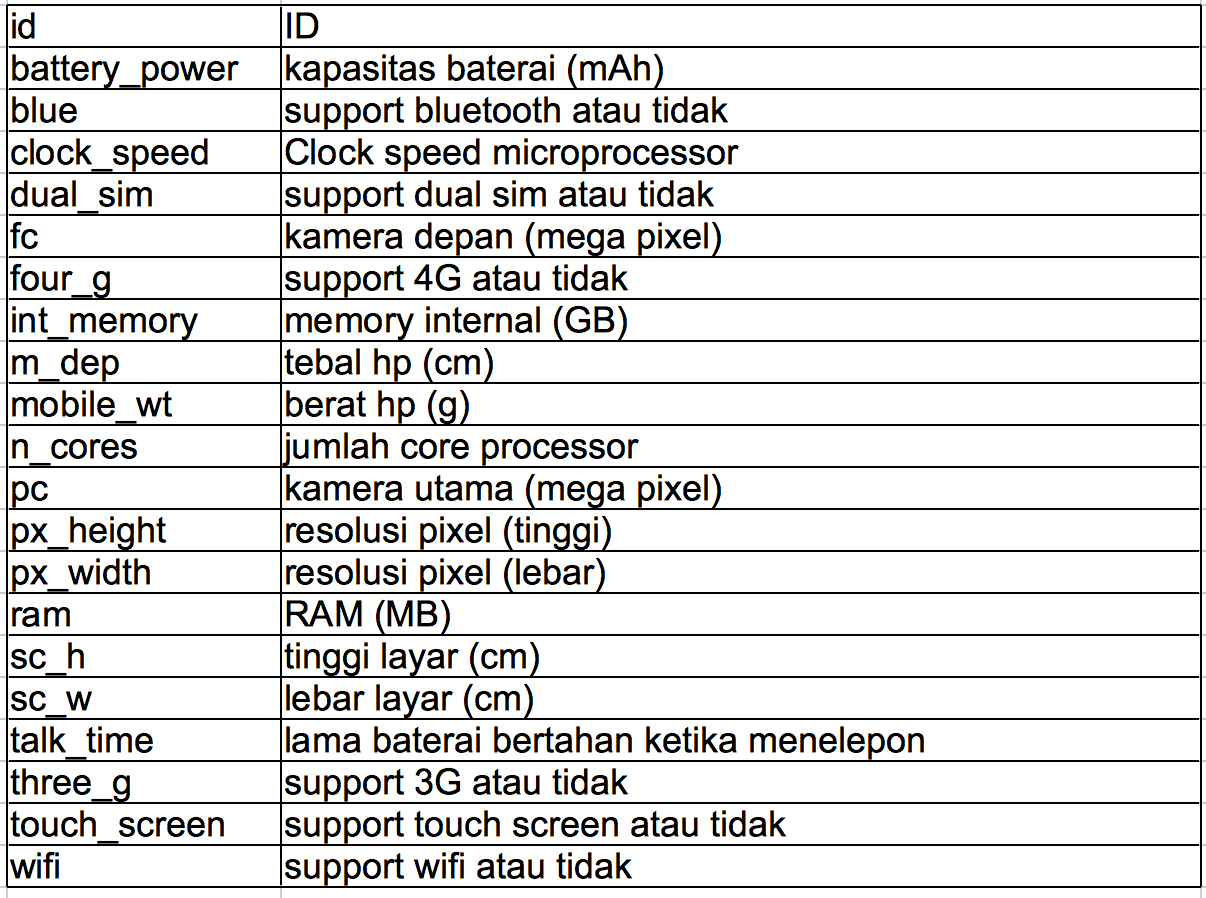

In [4]:
illustration.nomenklatur_mobile

In [5]:
data = pd.read_csv('mobile.csv')
data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

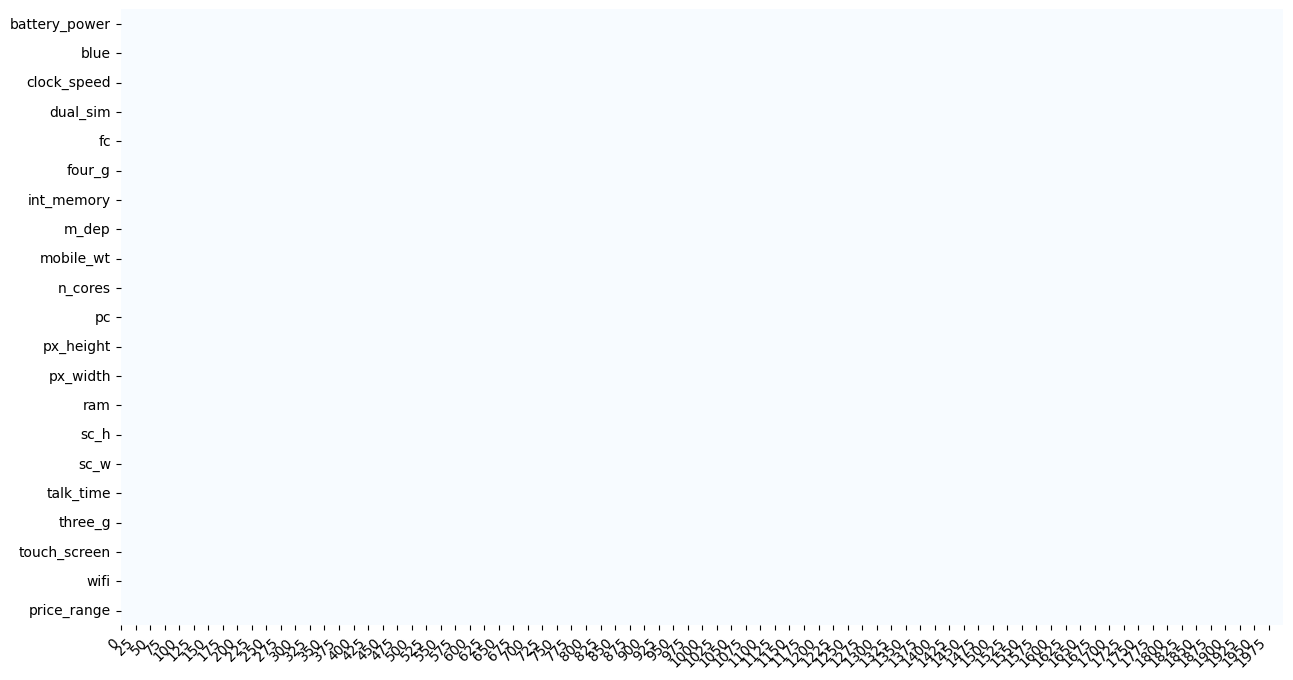

In [6]:
plot_missing_value(data)

In [7]:
data.groupby('price_range').mean()

battery_power   blue  clock_speed  dual_sim     fc  four_g  \
price_range                                                               
0                 1116.902  0.486       1.5502     0.500  4.084   0.518   
1                 1228.868  0.490       1.4886     0.510  4.340   0.524   
2                 1228.320  0.486       1.5298     0.498  4.498   0.494   
3                 1379.984  0.518       1.5204     0.530  4.316   0.550   

             int_memory   m_dep  mobile_wt  n_cores      pc  px_height  \
price_range                                                              
0                31.174  0.4902    140.552    4.600   9.574    536.408   
1                32.116  0.5240    140.510    4.298   9.924    666.892   
2                30.920  0.4908    143.614    4.682  10.018    632.284   
3                33.976  0.5020    136.320    4.502  10.150    744.848   

             px_width       ram    sc_h   sc_w  talk_time  three_g  \
price_range                                                          
0            1150.270   785.314  12.324  5.682     10.612    0.746   
1            1251.908  1679.490  12.212  5.544     11.362    0.756   
2            1234.046  2582.816  12.010  5.714     10.972    0.774   
3            1369.838  3449.232  12.680  6.128     11.098    0.770   

             touch_screen   wifi  
price_range                       
0                   0.524  0.496  
1                   0.522  0.504  
2                   0.470  0.504  
3                   0.496  0.524

#Data Splitting

In [8]:
X = data.drop(columns=['price_range'])
y = data.price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

#Training

In [9]:
X_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
968           1923     0          0.5         1   7       0          46   
240            633     1          2.2         0   0       1          49   
819           1236     0          0.9         1   2       1          57   
692            781     0          1.1         0   2       0          38   
420           1456     1          0.5         1   7       0           7   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
968    0.5        191        1  10        767      1759  1489    10     9   
240    0.1        139        8   1        529      1009  3560    11     1   
819    0.1        188        1  14        517       809  1406    14    12   
692    0.4        198        5   7        304      1674  3508    13     8   
420    0.4        105        5  12        823      1104  1587     6     5   

     talk_time  three_g  touch_screen  wifi  
968          3        1             1     1  
240         16        1             1     1  
819         20        1             0     1  
692          5        0             0     1  
420         20        1             0     1

In [10]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [11]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [15]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [21]:
#Preprocessing
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['battery_power', 'clock_speed', 'fc', 'int_memory',
                             'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                             'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']),
    ('categoric', cat_pipe(encoder = 'onehot'), ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen',
                               'wifi'])
])

#Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

#Training
model = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose = 1)
model.fit(X_train, y_train)

#Evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_,model.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9916584278578875 0.9365350956830536 0.9495204680554059


#Feature Importance



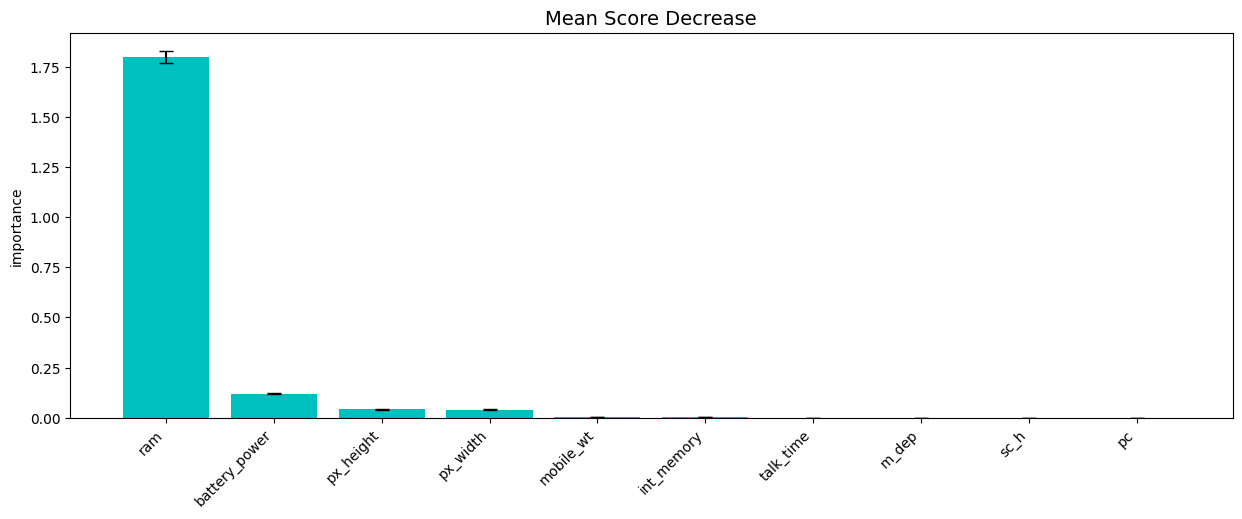

In [22]:
data_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk = 10)

#Phase 4: RandomizedSearchedCV with Feature importance

Dipakai jika parameter terlalu banyak

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [24]:
#Preprocessing
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['battery_power', 'px_height','px_width', 'ram'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestRegressor(n_jobs=-1, random_state=42))
])

#Training
model = RandomizedSearchCV(pipeline, rsp.rf_poly_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

#Evaluate
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 70, 'algo__max_features': 0.4041956411663823, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 165, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': True}
0.9897432136666999 0.9544845140433149 0.966609635677781
